In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
path = "/Users/macbookpro/Documents/Centrale Nantes/EI 2/Stage/Challenge 3/Diabetes-Data/data-01"
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
import warnings # Supress warnings 
warnings.filterwarnings('ignore')

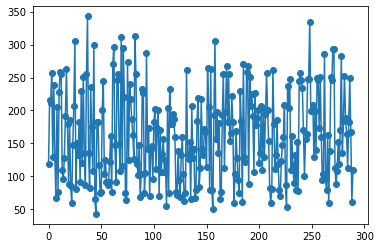

In [2]:
data_init = np.array(pd.read_table(path, sep="\t"))
value_glycemia = [58,59,60,61,62,63,64]
id_glycemia = np.array([data_init[i,2] in value_glycemia for i in range(len(data_init))])
data = np.array(data_init[id_glycemia,3], dtype=float)
plt.plot(data, '-o');

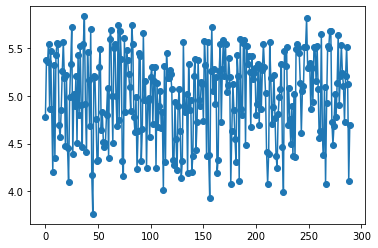

In [3]:
ldata = np.log(data)
plt.plot(ldata, '-o');

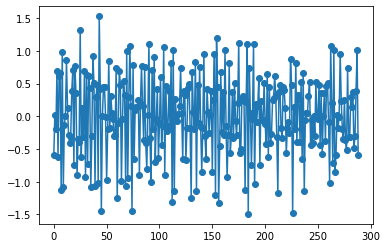

In [4]:
dldata = np.array([ldata[i]-ldata[i+1] for i in range(len(ldata)-1)])
plt.plot(dldata, '-o');

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

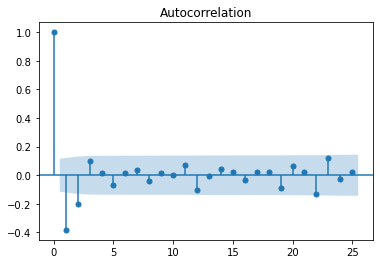

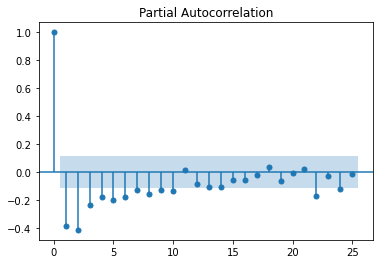

In [5]:
plot_acf(dldata), plot_pacf(dldata) ## --> Suggest MA(2)

In [6]:
models = [ARMA(dldata, order=(i,j)).fit() for i in range(3) for j in range(3)]
for model in models:
    print("*"*10)
    print(model.summary())
model = models[2] ## --> Best model

**********
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  289
Model:                     ARMA(0, 0)   Log Likelihood                -270.357
Method:                           css   S.D. of innovations              0.617
Date:                Thu, 30 Mar 2023   AIC                            544.715
Time:                        14:04:42   BIC                            552.047
Sample:                             0   HQIC                           547.653
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.036      0.008      0.994      -0.071       0.071
**********
                              ARMA Model Results                              
Dep. Variable:                

In [7]:
prediction = model.predict(end=50)

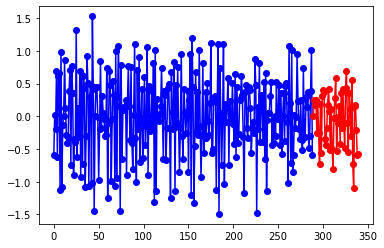

In [8]:
dldata_predict = np.concatenate((dldata, prediction))
plt.plot(np.arange(len(dldata)), dldata, '-ob');
plt.plot(np.arange(len(dldata), len(dldata_predict)), prediction, '-or');

In [9]:
replace_prediction = model.predict(start = len(dldata)-50+1, end=len(dldata))

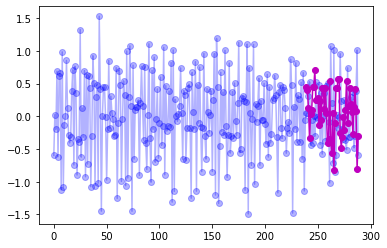

In [10]:
dldata_replace_predict = np.concatenate((dldata[:-50], replace_prediction))
plt.plot(dldata, '-ob', alpha=0.3);
plt.plot(np.arange(len(dldata[:-50]), len(dldata_replace_predict)), replace_prediction, '-om');

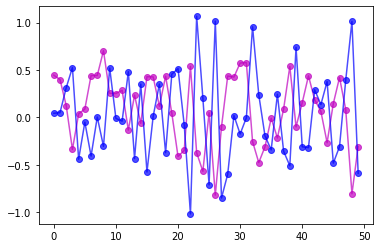

In [11]:
plt.plot(replace_prediction, '-om', alpha=0.7);
plt.plot(dldata[-50:], '-ob', alpha=0.7);